In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns

In [3]:
data_gdx = Path("../Random/Crypto2Stock/GDX5Y_Data.csv")
gdx_df = pd.read_csv(data_gdx, index_col="Date", parse_dates=True, infer_datetime_format=True)
gdx_df.head()

data_bxp = Path("../Random/Crypto2Stock/BXP5Y_Data.csv")
bxp_df = pd.read_csv(data_bxp, index_col="Date", parse_dates=True, infer_datetime_format=True)
bxp_df.head()

data_aapl = Path("../Random/Crypto2Stock/AAPL5Y_Data.csv")
aapl_df = pd.read_csv(data_aapl, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_df.head()

data_o = Path("../Random/Crypto2Stock/O5Y_Data.csv")
o_df = pd.read_csv(data_o, index_col="Date", parse_dates=True, infer_datetime_format=True)
o_df.head()

data_eqr = Path("../Random/Crypto2Stock/EQR5Y_Data.csv")
eqr_df = pd.read_csv(data_eqr, index_col="Date", parse_dates=True, infer_datetime_format=True)
eqr_df.head()

data_inx = Path("../Random/Crypto2Stock/SP5Y_Data.csv")
inx_df = pd.read_csv(data_inx, index_col="Date", parse_dates=True, infer_datetime_format=True)
inx_df.head()

,Close
Date,
2015-03-18 16:00:00,2099.50
2015-03-19 16:00:00,2089.27
2015-03-20 16:00:00,2108.10
2015-03-23 16:00:00,2104.42
2015-03-24 16:00:00,2091.50


In [4]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([gdx_df, bxp_df, o_df, eqr_df, aapl_df, inx_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index()

# Set column names to 'GDX' 'BXP' 'O' 'EQR' 'AAPL' 'INX'
combined_df.columns = ["GDX", "BXP", "O", "EQR", "AAPL", "S&P"]

# Display a few rows
combined_df

,GDX,BXP,O,EQR,AAPL,S&P
Date,,,,,,
2015-03-18 16:00:00,18.84,141.13,52.01,80.41,128.47,2099.50
2015-03-19 16:00:00,18.71,141.15,52.24,79.73,127.50,2089.27
2015-03-20 16:00:00,19.33,144.73,53.65,81.73,125.90,2108.10
2015-03-23 16:00:00,19.75,144.74,53.46,81.46,127.21,2104.42
2015-03-24 16:00:00,19.64,143.98,52.58,80.83,126.69,2091.50
...,...,...,...,...,...,...
2020-03-11 16:00:00,25.17,121.29,73.56,75.10,275.43,2741.38
2020-03-12 16:00:00,22.31,111.89,67.74,70.01,248.23,2480.64
2020-03-13 16:00:00,19.00,117.06,71.92,73.61,277.97,2711.02


In [5]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns

,GDX,BXP,O,EQR,AAPL,S&P
Date,,,,,,
2015-03-18 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-19 16:00:00,-0.006900,0.000142,0.004422,-0.008457,-0.007550,-0.004873
2015-03-20 16:00:00,0.033137,0.025363,0.026991,0.025085,-0.012549,0.009013
2015-03-23 16:00:00,0.021728,0.000069,-0.003541,-0.003304,0.010405,-0.001746
2015-03-24 16:00:00,-0.005570,-0.005251,-0.016461,-0.007734,-0.004088,-0.006139
...,...,...,...,...,...,...
2020-03-11 16:00:00,-0.084394,-0.068934,-0.039561,-0.060428,-0.034730,-0.048868
2020-03-12 16:00:00,-0.113627,-0.077500,-0.079119,-0.067776,-0.098755,-0.095113
2020-03-13 16:00:00,-0.148364,0.046206,0.061707,0.051421,0.119808,0.092871


In [28]:
# Calculate covariance of all daily returns of REIT's, Gold, and Apple vs. S&P 500
gdx_covariance = daily_returns['GDX'].cov(daily_returns['S&P'])
bxp_covariance = daily_returns['BXP'].cov(daily_returns['S&P'])
o_covariance = daily_returns['O'].cov(daily_returns['S&P'])
eqr_covariance = daily_returns['EQR'].cov(daily_returns['S&P'])
aapl_covariance = daily_returns['AAPL'].cov(daily_returns['S&P'])

print("GDX Covariance:")
print(gdx_covariance)
print("BXP Covariance:")
print(bxp_covariance)
print("O Covariance:")
print(o_covariance)
print("EQR Covariance:")
print(eqr_covariance)
print("AAPL Covariance:")
print(aapl_covariance)

GDX Covariance:
7.038839570852433e-07
BXP Covariance:
9.797616396163661e-05
O Covariance:
7.792495700326385e-05
EQR Covariance:
8.015102687748532e-05
AAPL Covariance:
0.00013970636695108892


In [11]:
# Calculate variance of all daily returns of REIT's, Gold, and AAPL vs. S&P 500
variance = daily_returns['S&P'].var()
variance

0.00011484154458491329

In [12]:
# Calculate beta of all daily returns of REIT's, Gold, and Apple
gdx_beta = gdx_covariance / variance
bxp_beta = bxp_covariance / variance
o_beta = o_covariance / variance
eqr_beta = eqr_covariance / variance
aapl_beta = aapl_covariance / variance

print(f" GDX: {gdx_beta} | BXP: {bxp_beta} | O: {o_beta} | EQR: {eqr_beta} | AAPL: {aapl_beta})")

 GDX: 0.006129175287822734 | BXP: 0.8531421648477873 | O: 0.6785432683348012 | EQR: 0.6979271061459995 | AAPL: 1.21651417573708)


In [14]:
# Calculate 30-day rolling covariance of REIT's, Gold, and Apple vs. S&P 500 and plot the data
rolling_gdx_covariance = daily_returns['GDX'].rolling(window=30).cov(daily_returns['S&P'])
rolling_bxp_covariance = daily_returns['BXP'].rolling(window=30).cov(daily_returns['S&P'])
rolling_o_covariance = daily_returns['O'].rolling(window=30).cov(daily_returns['S&P'])
rolling_eqr_covariance = daily_returns['EQR'].rolling(window=30).cov(daily_returns['S&P'])
rolling_aapl_covariance = daily_returns['AAPL'].rolling(window=30).cov(daily_returns['S&P'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns['S&P'].rolling(window=10).var()

# Calculate 30-day rolling beta of stocks and plot the data
rolling_gdx_beta = rolling_gdx_covariance / rolling_variance
rolling_bxp_beta = rolling_bxp_covariance / rolling_variance
rolling_o_beta = rolling_o_covariance / rolling_variance
rolling_eqr_beta = rolling_eqr_covariance / rolling_variance
rolling_aapl_beta = rolling_aapl_covariance / rolling_variance
rolling_aapl_beta.tail()

Date
2020-03-11 16:00:00    0.474842
2020-03-12 16:00:00    0.466355
2020-03-13 16:00:00    0.430447
2020-03-16 16:00:00    0.456382
2020-03-17 16:00:00    0.419035
dtype: float64

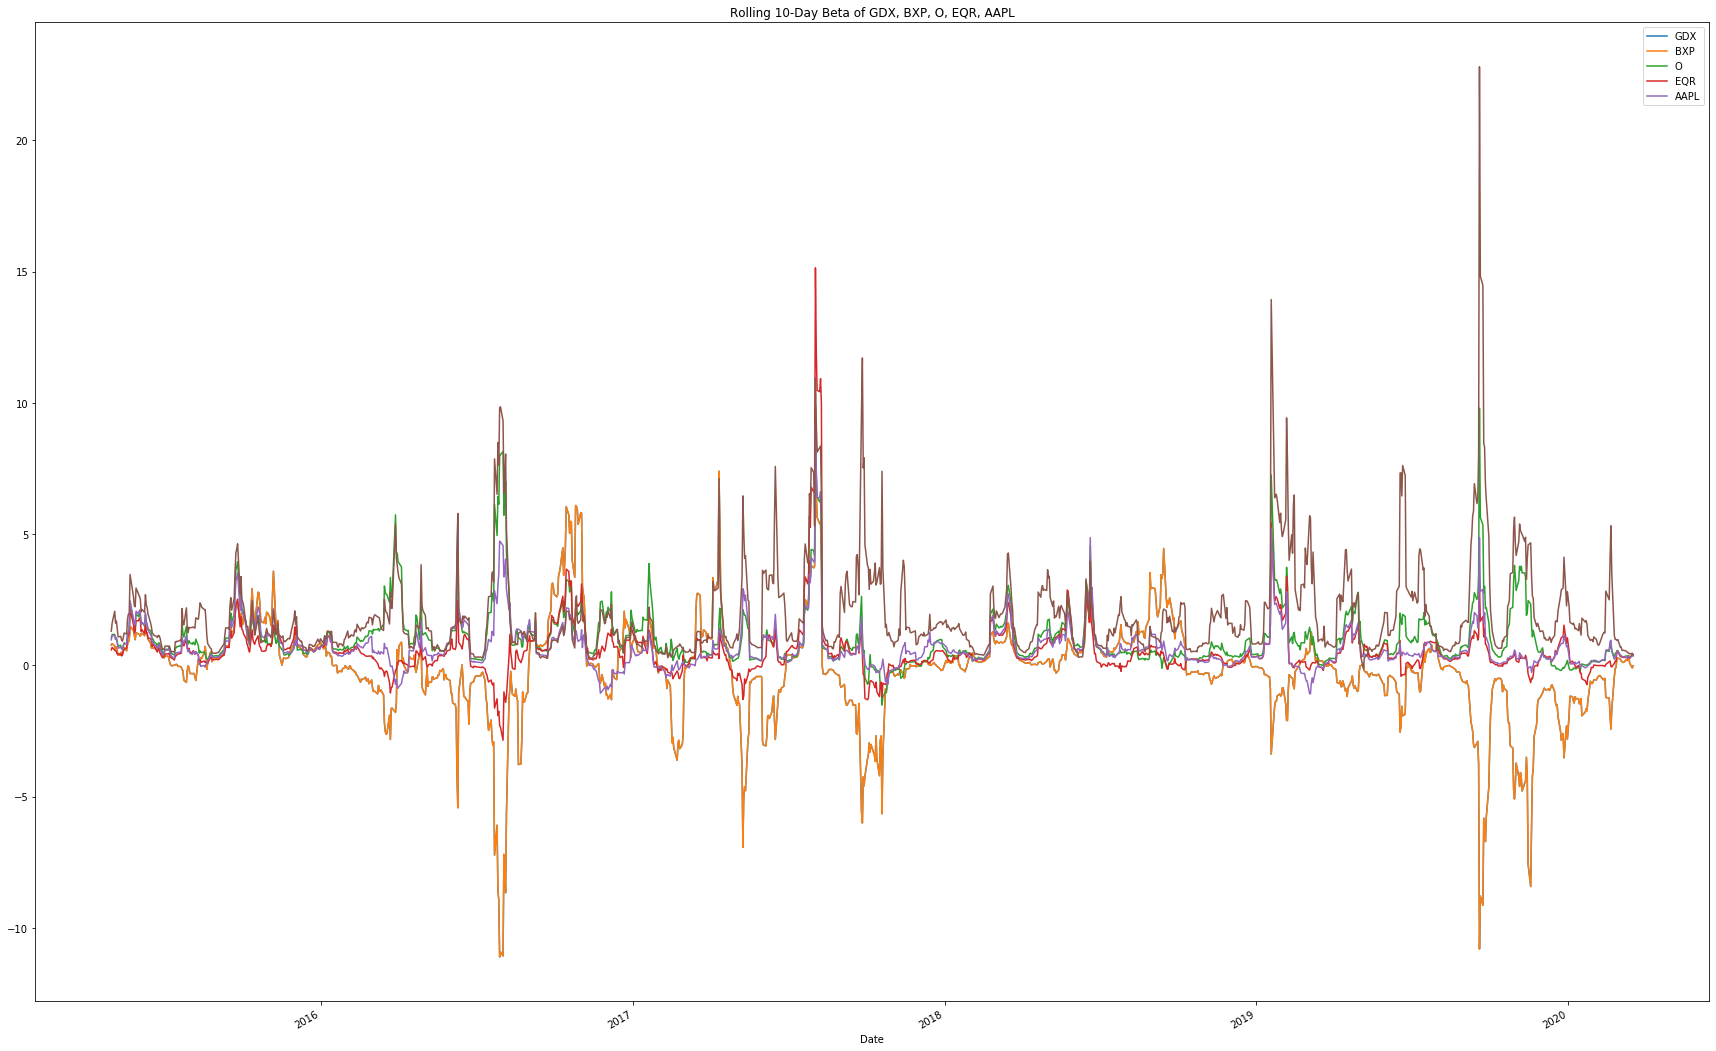

In [16]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_gdx_beta.plot(figsize=(30, 20), title='Rolling 10-Day Beta of GDX, BXP, O, EQR, AAPL')
rolling_gdx_beta.plot(ax=ax)
rolling_bxp_beta.plot(ax=ax)
rolling_o_beta.plot(ax=ax)
rolling_eqr_beta.plot(ax=ax)
rolling_aapl_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["GDX", "BXP", "O", "EQR", "AAPL"])

In [17]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily returnweights = [0.25, 0.25, 0.25, 0.25]
weights1 = [0.1,0.1,0.1,0.05,0.05, 0.1]
portfolio_returns = daily_returns.dot(weights1)
portfolio_returns.head()

Date
2015-03-18 16:00:00         NaN
2015-03-19 16:00:00   -0.001521
2015-03-20 16:00:00    0.010077
2015-03-23 16:00:00    0.002006
2015-03-24 16:00:00   -0.003933
dtype: float64

In [18]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns

Date
2015-03-18 16:00:00         NaN
2015-03-19 16:00:00    0.998479
2015-03-20 16:00:00    1.008541
2015-03-23 16:00:00    1.010564
2015-03-24 16:00:00    1.006589
                         ...   
2020-03-11 16:00:00    1.181359
2020-03-12 16:00:00    1.128360
2020-03-13 16:00:00    1.143936
2020-03-16 16:00:00    1.086016
2020-03-17 16:00:00    1.126412
Length: 1258, dtype: float64

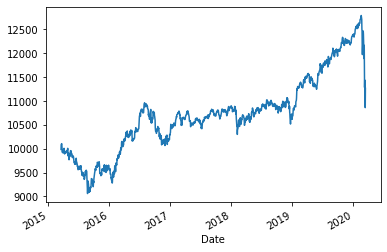

In [19]:
# Plot the returns of the portfolio in terms of money, $10,000
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

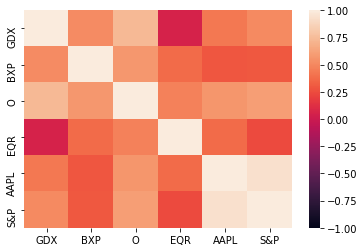

In [29]:
price_correlation = combined_df.corr()
sns.heatmap(price_correlation, vmin=-1, vmax=1)